## Лабораторная работа 4 - Предварительная обработка данных
Разделы:
1. Загрузка данных
2. Пропуски в данных
3. Нормализация и удаление выбросов
4. Pipeline
5. Тест наших данных с помощью SVM

In [59]:
# подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

%matplotlib inline

### 1. Загрузка данных

**Обратите внимание**  
При загрузки данных мы сразу же выбираем поле для индексации, это нужно для дальнейшего разделения данныех и удаления выбросов в обоих

In [60]:
import pandas as pd

data = pd.read_csv('../../../../data/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Пропуски в данных  
В исходных даннах могут быть пропуски (None, null, NaN) их надо как то удалять

In [61]:
# Так как в исходных данных нету пропусков то создадим их случайным образом
import random
from numpy import NaN

rnd = random.Random('seed для генератора случайных чисел (можно изменить)')

nan_data = data.copy()
for i in range(nan_data.shape[0]):
    if rnd.randint(0, 100) < 10:
        select_column = rnd.choice(nan_data.columns)
        #print(select_column, i)
        nan_data[select_column][i] = NaN

print('\nИзначально')
print(data.dropna().count())
print('\nПосле обработки')
print(nan_data.dropna().count())
nan_data.head(55)

E:\Users\Bandar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
E:\Users\Bandar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



Изначально
PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

После обработки
PassengerId    162
Survived       162
Pclass         162
Name           162
Sex            162
Age            162
SibSp          162
Parch          162
Ticket         162
Fare           162
Cabin          162
Embarked       162
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,NaN
5,6.0,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,NaN,C


#### Удаление пропусков через простое заполнение

In [62]:
# заполнение пропусков константой
nan_data_fill_simple = nan_data.fillna(0)
# В 4 строке появился 0 вместо класса, изначально там был NaN
nan_data_fill_simple.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,0,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,0,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,0,0
5,6.0,0.0,3.0,"Moran, Mr. James",male,0.0,0.0,0.0,330877,8.4583,0,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,0,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,0,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,0,C


In [63]:
# Удаление пропусков через взятия среднего
nan_data_fill_mean = nan_data.fillna(nan_data.mean())
print(f'Mean: \n{nan_data.mean()}')
nan_data_fill_mean.head(20)

Mean: 
PassengerId    445.883484
Survived         0.384615
Pclass           2.302511
Age             29.795438
SibSp            0.523702
Parch            0.383220
Fare            32.181374
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.000000,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.000000,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.000000,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,NaN
5,6.0,0.0,3.000000,"Moran, Mr. James",male,29.795438,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.000000,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.000000,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.000000,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,NaN,C


In [64]:
# Удаление пропусков через их заполнения соседнеми значениями
# pad - это метод при котором значение берется с соседней ячейки
nan_data_fill_near_value = nan_data.fillna(method='pad')
nan_data_fill_near_value.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C85,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,C123,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,35.0,0.0,0.0,330877,8.4583,C123,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,E46,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2.0,347742,11.1333,E46,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,E46,C


Полная документация по pandas.DataFrame.fillna() доступна по ссылке https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

#### Удаление пропусков через интерполяцию

In [65]:
# заполнение пропусков через интерполяцио столбцов с заполнением пропусков
nan_data_interpolate = nan_data.interpolate(method='cubic')
nan_data_interpolate.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.000000,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.000000,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.000000,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,NaN,NaN
5,6.0,0.0,3.000000,"Moran, Mr. James",male,58.241440,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.000000,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.000000,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,3.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,NaN,S
9,10.0,1.0,2.000000,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,NaN,C


In [66]:
nan_data_interpolate.dropna().count()

PassengerId    196
Survived       196
Pclass         196
Name           196
Sex            196
Age            196
SibSp          196
Parch          196
Ticket         196
Fare           196
Cabin          196
Embarked       196
dtype: int64

**Обратите внимание**  
Интерполяция не спасает от пропусков в случает если они в не числовых данных, так же она не делает экстраполяцию.  
Её лучше всего совмещять вместе с методом fillna для заполнения оставшихся пропусков основываясь на соседях

**Пример**

In [67]:
nan_data_interpolate_fill_near_value = nan_data_interpolate.fillna(method='pad')

In [68]:
nan_data_interpolate_fill_near_value.dropna().count()

PassengerId    890
Survived       890
Pclass         890
Name           890
Sex            890
Age            890
SibSp          890
Parch          890
Ticket         890
Fare           890
Cabin          890
Embarked       890
dtype: int64

In [69]:
nan_data_interpolate_fill_near_value.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.000000,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.000000,"Heikkinen, Miss. Laina",female,26.000000,0.0,0.0,STON/O2. 3101282,7.9250,C85,S
3,4.0,1.0,1.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.000000,"Allen, Mr. William Henry",male,35.000000,0.0,0.0,373450,8.0500,C123,S
5,6.0,0.0,3.000000,"Moran, Mr. James",male,58.241440,0.0,0.0,330877,8.4583,C123,Q
6,7.0,0.0,1.000000,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0.0,17463,51.8625,E46,S
7,8.0,0.0,3.000000,"Palsson, Master. Gosta Leonard",male,2.000000,3.0,1.0,349909,21.0750,E46,S
8,9.0,1.0,3.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0.0,2.0,347742,11.1333,E46,S
9,10.0,1.0,2.000000,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0.0,237736,30.0708,E46,C


In [70]:
# В крайнем случае вы можите просто выкинуть данные с пропусками, но делайте это в самом крайнем случае
nan_data_dropnan = nan_data.dropna()
print(nan_data_dropnan.count())
nan_data_dropnan.head(20)

PassengerId    162
Survived       162
Pclass         162
Name           162
Sex            162
Age            162
SibSp          162
Parch          162
Ticket         162
Fare           162
Cabin          162
Embarked       162
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
23,24.0,1.0,1.0,"Sloper, Mr. William Thompson",male,28.0,0.0,0.0,113788,35.5000,A6,S
54,55.0,0.0,1.0,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C
62,63.0,0.0,1.0,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.4750,C83,S
66,67.0,1.0,2.0,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0.0,0.0,C.A. 29395,10.5000,F33,S


### 2. Нормализация  

Нормализация данных это приведение данных в некий стандартный вид

Для алгоритмов машинного обучения это - числовой вид и желательно что бы все числа лежали в диапазоне от -1 до 1 или от 0 до 1
Так же тут необходимо убрать [выбросы (промахи)](https://goo.gl/Xh9kgc) в данных

In [71]:
# Исходные данные
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
data = data.drop(["Name", "Ticket", "Cabin"], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Как можно видеть ниже мы преобразовали колонку *Species* в 3 колонки к которых записан либо 0 либо 1  
3 колонки потому что в колонки 3 класса (3 разных надписи)  
0 или 1 - это какой клас был изначально

In [73]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(data)
number_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [74]:
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


Как можно заметить, у некоторых персоналий отсутсвует возраст. Интерполируем его

In [75]:
number_data = number_data.interpolate(method='cubic')
number_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [76]:
number_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


Простая номализация.  
Данных маштабируются на промежуток от 0 до 1, где 0 - минимум в данных, а 1 - это максимум.  
Все остальные находятся между ними

*Обратите внимание на размер оси y на графике*

In [77]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.400500,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.001124,1.0,0.0,0.547042,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,1.0,0.437135,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.003371,1.0,0.0,0.519565,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0.004494,0.0,1.0,0.519565,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


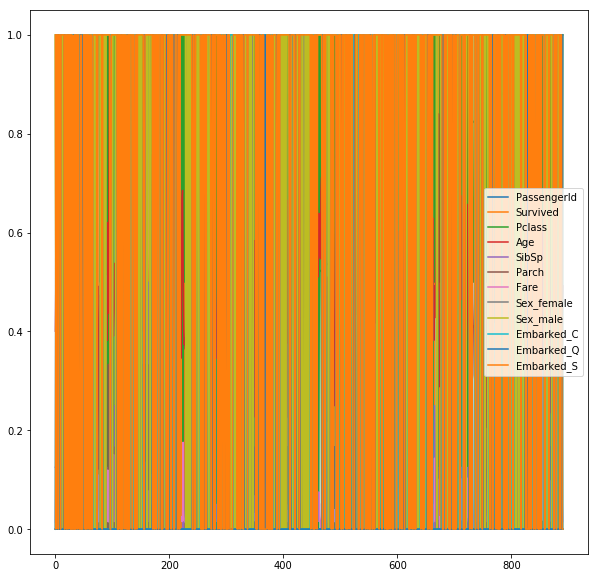

In [78]:
# Данный нормализатор выравнивает данные относительно минимального и максимального
mm_norm_number_data.plot(figsize=(10, 10))

Следующий нормализатор похож на предыдущий, только он маштабирует данные относительно максимального по модулю

In [79]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))

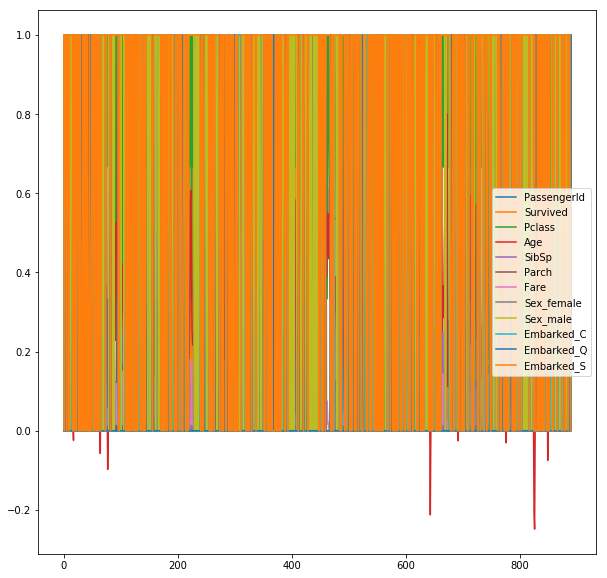

In [80]:
ma_norm_data.plot(figsize=(10, 10))

Это более продвинутая нормализация, она использует статистику для определения центра в данных (мат. ожинания) и висперсии данных и в соответствие с этим маштабирует данные

In [81]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))

**Обратите внимание**  
Данные хоть и маштабированы, но они не лежат в диапазоне от -1 до 1, а привышают его. Тут можно испоьзовать дополнительно *MinMaxScaler*

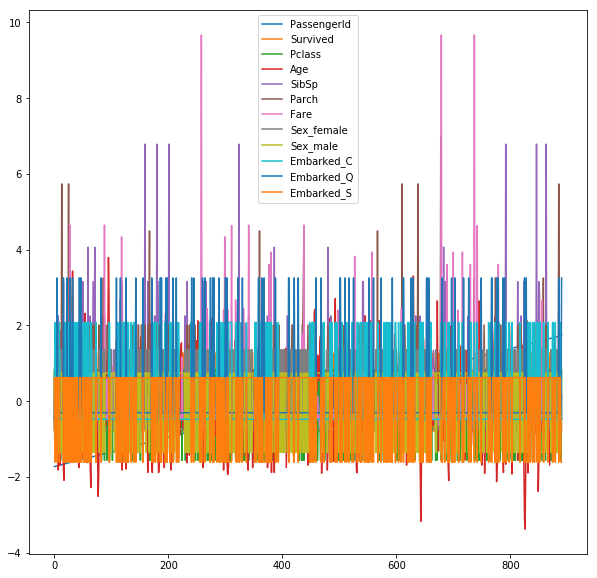

In [82]:
std_norm_data.plot(figsize=(10, 10))

Данный нормализатор похож на предидущий, только он в добавок ко всему убирает выбросы (промахи) в данных

In [83]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))

Тут все те же проблемы, что и у *StandartScaler*

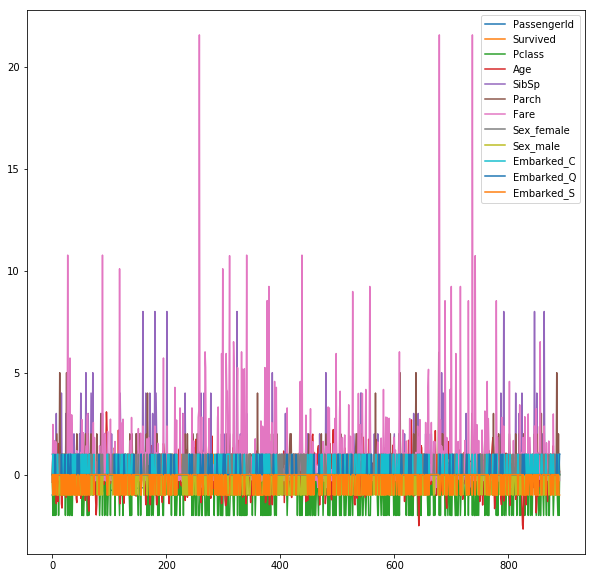

In [84]:
std_clear_norm_data.plot(figsize=(10, 10))

### 4. Pipeline  

Pipeline - это обект который умеет обединять в себе несколько препроцессоров для данных превращая их в один

Давайте напишем свой pipeline для обработки наших входных данных

Для начала давайте напишем несколько наших препроцессоров
1. препроцессор для удаления выбросов написаный руками. Для его реализации будем использовать правило 3-х сигм для нормального распределния
2. простой препроцессор для преобразования обекта DataFrame в ndarray

In [85]:
# создадим свой препроцессор
import sklearn.pipeline as pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class DropOutlet(BaseEstimator):
    """
    Удаление выбросов, основываясь на правиле 3-х сигм (только для нормального распределения)
    """
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Получаем стандартное отклонение для каждого столбца и сохраняем их        
        """
        data.select_dtypes(include=['float', 'int'])
        self.std = X.std()
        self.columns = self.std.index.values
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Убираем все здачения, котоые находятся дальше 3-х стандартных отконений (сигма) от мат. ожидания случайной величины
        """
        X_cols = X[self.columns]
        return X[ (X_cols - X_cols.mean()).abs() <= 3*self.std ].dropna()

class PandasToNumpy(BaseEstimator):
    """
    Просто преобразует данные из DataFrame от pandas к матрице от numpy (ndarray)
    """
    
    def fit(self, X : pd.DataFrame = None, y=None):
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> np.ndarray:
        return X.values
    
class SparseToArray(TransformerMixin, BaseEstimator):
    """
    Класс преобразует sparse matrix в ndarray
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.toarray()

class ModifyLabelEncoder(preprocessing.LabelEncoder):
    """
    Стандартный костыль для препроцессора LabelEncoder
    """
    
    def fit(self, X, y=None):
        return super().fit(X)
    
    def transform(self, X, y=None):
        print(1)
        return super().transform(X)
    
    def fit_transform(self, X, y=None):
        return super().fit_transform(X)

Наш pipeline будет состоять из:
1. DropOutlet - шаш класс для удаления выбросов
2. Конвертация из DataFrame в ndarray
3. Нормализация с помощью препроцессора MinMaxScaler

У pipeline обектов есть 3 метода:
- fit - тренирует обект. Тут происходит запоминание особенностей данных если они нужны
- transform - непосредственное преобразует данные
- fit_transform - вначале тренирует, а потом преобразует

In [86]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [87]:
data = pd.get_dummies(data)

In [88]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [89]:
# Создадим наш pipeline
# drop_outlet, to_matrix, norm - это просто названия препроцессоров данное пользователем
# выбираем данные для обучающей выборки (то что будет подано на вход алгоритмам машинного обучения)
X_data = data[data.columns[:-1]].copy()
# Кодируем все классы в виде единичных векторов
X_data = pd.get_dummies(X_data)

# выбираем данные для обучающей выборки (то что будет на выходу алгоритмов машинного обучения)
Y_data = data[data.columns[-1]].copy()

# Убираем вылеты из данных
pipe_outlet = pipeline.Pipeline([
    ('drop_outlet', DropOutlet()),
])

outletless_data_X = pipe_outlet.fit_transform(X_data)

# Соглачуем два массива X и Y
# Записи которые были удалены из массива X должны быть удалены и из массива Y
# Для удаления записей мы берем индексы из массива X и оставляем записи в массиве Y с индексами, которые есть в X
outletless_data_Y = Y_data[ Y_data.index.isin(outletless_data_X.index) ]

# Нормализуем данные X
pipe_x = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('norm', preprocessing.MinMaxScaler())
])

# Нормализуем данные Y
pipe_y = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder()),
])

# вызываем препроцессоры
number_data_ready_X = pipe_x.fit_transform(outletless_data_X)
number_data_ready_Y = pipe_y.fit_transform(outletless_data_Y)

print(number_data_ready_X.shape, number_data_ready_Y.shape)

(634, 11) (634,)


In [90]:
number_data_ready_X[:5,:], number_data_ready_Y

(array([[0.        , 0.        , 1.        , 0.30575234, 0.33333333,
         0.        , 0.04397492, 0.        , 1.        , 0.        ,
         0.        ],
        [0.00112486, 1.        , 0.        , 0.53244545, 0.33333333,
         0.        , 0.4323693 , 1.        , 0.        , 1.        ,
         0.        ],
        [0.00224972, 1.        , 1.        , 0.36242562, 0.        ,
         0.        , 0.04806914, 1.        , 0.        , 0.        ,
         0.        ],
        [0.00337458, 1.        , 0.        , 0.48994049, 0.33333333,
         0.        , 0.32207838, 1.        , 0.        , 0.        ,
         0.        ],
        [0.00449944, 0.        , 1.        , 0.48994049, 0.        ,
         0.        , 0.04882733, 0.        , 1.        , 0.        ,
         0.        ]]),
 array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Как можно видеть выше мы получили на выходе многомерный массив. именно его и мы будем в дальнейшем подавать на вход для алгоритмов машинного обучения

Для знакомства с массивами из библиотеки NumPy воспользуйтесь ссылкой http://cs231n.github.io/python-numpy-tutorial/

### Проверяем наши обработанные данные
**Делать это не надо это просто демонстрация, что можно делать дальше**

In [27]:
from sklearn.svm import SVC

svm = SVC(verbose=True, C=1.0, max_iter=200, tol=1e-12)

Y = number_data_ready_Y
X = number_data_ready_X
print(X.shape, Y.shape)

svm.fit(X, Y)

svm.score(X, Y)

(149, 4) (149,)
[LibSVM]

0.9664429530201343

In [28]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


(149, 2)


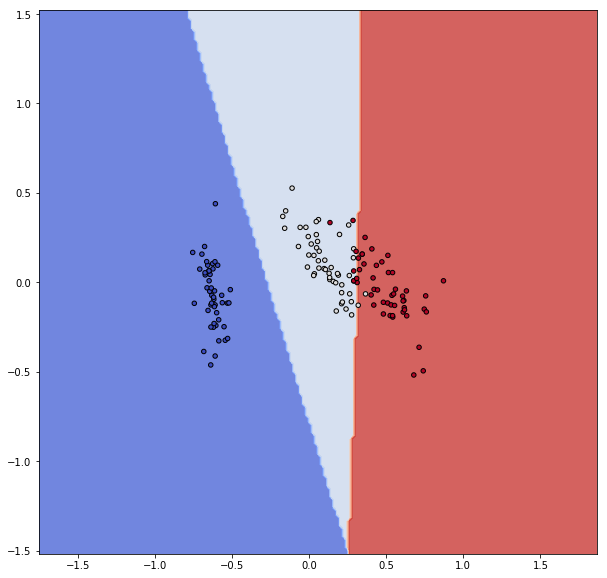

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')